In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("top100videogamesales.csv")

# Regional Sales by Publisher Bar Chart
##### The x-axis represents the different publishers.
##### The y-axis represents the total sales (in millions) for each publisher.
##### Each bar is segmented into different colors representing sales in different regions: North America (NA_Sales), Europe (EU_Sales), Japan (JP_Sales), and other regions (Other_Sales).

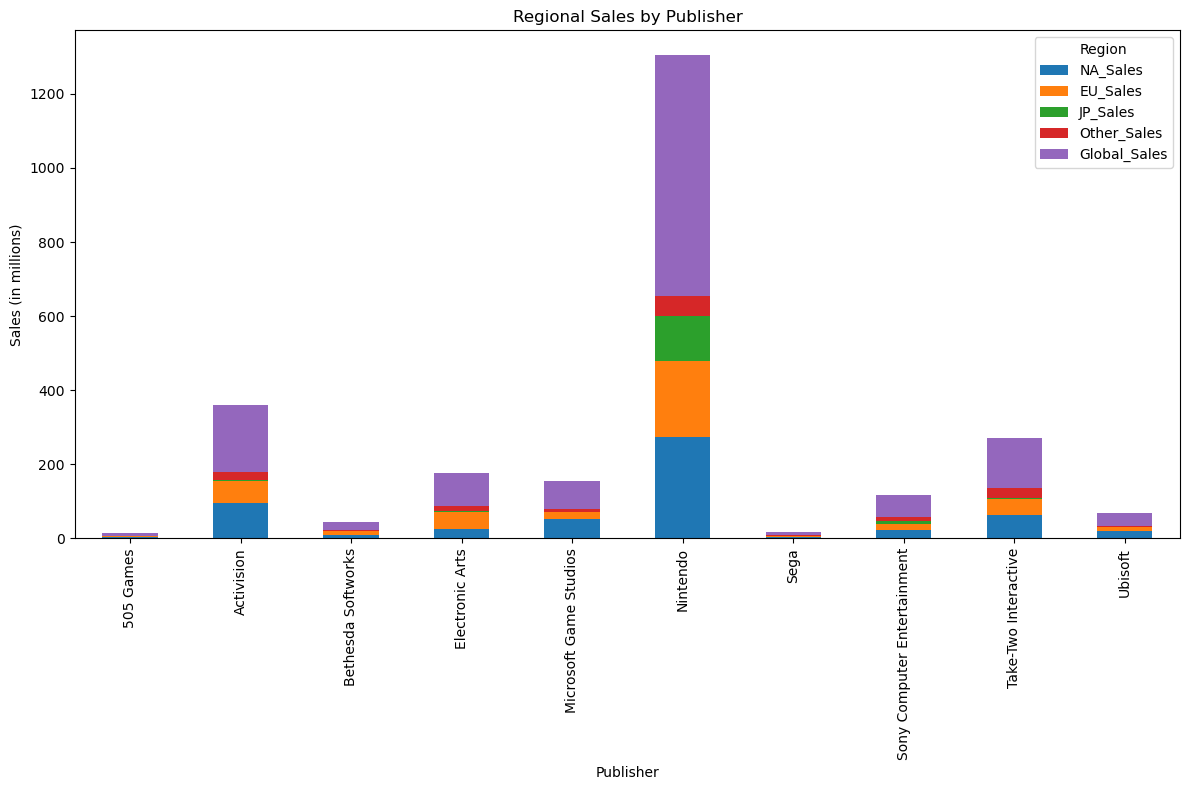

In [4]:
publisher_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

publisher_sales.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Regional Sales by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [5]:
top_publisher = publisher_sales['Global_Sales'].idxmax()
top_sales = publisher_sales['Global_Sales'].max()

print(f"The publisher with the most sales is '{top_publisher}' with global sales of {top_sales:.2f} million.")

The publisher with the most sales is 'Nintendo' with global sales of 653.18 million.
